[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Hanifan12/Food-Calories/blob/main/Make_Prediction_From_Saved_Model.ipynb)

# **MAKE PREDICTION FROM SAVED MODEL**

# **Setup**

Import libraries such as Tensorflow and other libraries are required :


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import load_model

# **Access File From Google Drive**

Mounting Google Drive locally and copy path 

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
path = '/content/drive/Shareddrives/Dataset/model_3_97.h5'

# **Load Model**

In [4]:
model = load_model(path)

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3843  

In [7]:
label = ['chicken_wings', 'ice_cream', 'spaghetti']

# **Making Prediction**

STEP 1 : Upload Image for Prediction 

In [8]:
from google.colab import files
img = files.upload()

Saving spagheti-966389_1920.jpg to spagheti-966389_1920.jpg


In [9]:
for fn in img.keys():
  img = fn
img_path = '/content/' + img

STEP 2 : Making Prediction

Before that we import some libraries such as numpy and other libraries

In [10]:
img_height, img_width = 224, 224

In [11]:
## get the prediction based on the max value
img = keras.preprocessing.image.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

STEP 3 : Get the Prediction based on the max value 

This image most likely belongs to spaghetti with a 99.83 percent confidence.


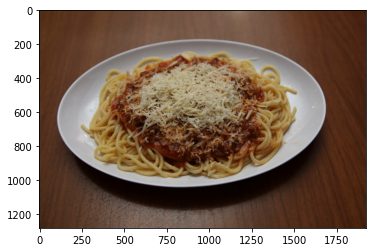

In [12]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(label[np.argmax(score)], 100 * np.max(score))
)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()